# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [3]:
# Resolver acá
import wbdata
import pandas as pd
indicadores = {"GFDD.DM.01": "Capitalización bursátil respecto al PIB (%)","GFDD.DI.02": "Activos de bancos comerciales respecto al PIB (%)"}
#GFDD.DM.01 Capitalización bursátil respecto al PIB (%)
#GFDD.DI.02 Activos de bancos comerciales respecto al PIB (%)
data = wbdata.get_dataframe(indicadores, country=['USA','ARG'])
df = pd.DataFrame(data=data)

In [4]:
df = df.reset_index()  # Asegurar que 'date' es una columna
df_usa = df[df['country'] == 'United States'].sort_values(by='date', ascending=False).head(11)
df_argentina = df[df['country'] == 'Argentina'].sort_values(by='date', ascending=False).head(11)

# Unir los dos DataFrames
df_combined = pd.concat([df_usa, df_argentina])

print(df_combined)


          country  date  Capitalización bursátil respecto al PIB (%)  \
62  United States  2021                                          NaN   
63  United States  2020                                    194.88900   
64  United States  2019                                    158.57200   
65  United States  2018                                    148.27300   
66  United States  2017                                    164.89400   
67  United States  2016                                    146.30700   
68  United States  2015                                    137.68800   
69  United States  2014                                    150.02600   
70  United States  2013                                    142.69800   
71  United States  2012                                    114.85400   
72  United States  2011                                    100.26300   
0       Argentina  2021                                          NaN   
1       Argentina  2020                                         

In [5]:
df_combined

,country,date,Capitalización bursátil respecto al PIB (%),Activos de bancos comerciales respecto al PIB (%)
62,United States,2021,NaN,NaN
63,United States,2020,194.88900,74.16846
64,United States,2019,158.57200,64.00681
65,United States,2018,148.27300,63.22401
66,United States,2017,164.89400,63.03008
67,United States,2016,146.30700,63.93101
68,United States,2015,137.68800,60.82715
69,United States,2014,150.02600,59.23862
70,United States,2013,142.69800,58.27073
71,United States,2012,114.85400,59.29870


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [6]:
# Resolver acá

#Defino los indicadores a analizar
indicadores = ["Capitalización bursátil respecto al PIB (%)","Activos de bancos comerciales respecto al PIB (%)"]

#Estadistica descriptiva agrupada por pais
stats_por_pais = df_combined.groupby("country")[indicadores].describe().transpose()

#cantidad de datos, promedio, desvio estandar, minimo, maximo y percentiles.
print(stats_por_pais)

country                                                  Argentina  \
Capitalización bursátil respecto al PIB (%)       count   9.000000   
                                                  mean   10.082622   
                                                  std     3.004756   
                                                  min     6.273970   
                                                  25%     8.699630   
                                                  50%     9.438370   
                                                  75%    11.407600   
                                                  max    16.894800   
Activos de bancos comerciales respecto al PIB (%) count   7.000000   
                                                  mean   22.214654   
                                                  std     1.024188   
                                                  min    20.840890   
                                                  25%    21.883340   
                    

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

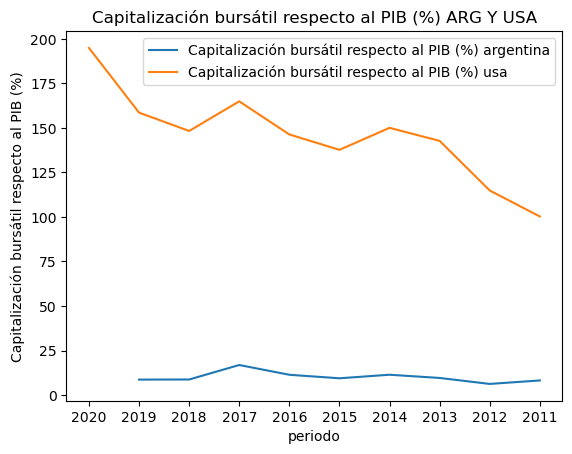

In [7]:
# Resolver acá estilo pyplot
import matplotlib.pyplot as plt
# Definimos  vectores  de datos  para  serie 1 (Capitalización bursátil respecto al PIB (%))
x1 = df_argentina[df_argentina["country"]=="Argentina"]["Capitalización bursátil respecto al PIB (%)"]
y1 = df_argentina[df_argentina["country"]=="Argentina"]["date"]
# Definimos  vectores  de datos  para  serie 2 (térmica)
x2 = df_usa[df_usa["country"]=="United States"]["Capitalización bursátil respecto al PIB (%)"]
y2 = df_usa[df_usa["country"]=="United States"]["date"]


plt.plot(y1, x1, label="Capitalización bursátil respecto al PIB (%) argentina") # serie 1
plt.plot(y2, x2, label="Capitalización bursátil respecto al PIB (%) usa") # serie 2

# Modifico  labels
plt.xlabel("periodo")
plt.ylabel("Capitalización bursátil respecto al PIB (%)")
plt.title("Capitalización bursátil respecto al PIB (%) ARG Y USA")
plt.legend()
plt.show()

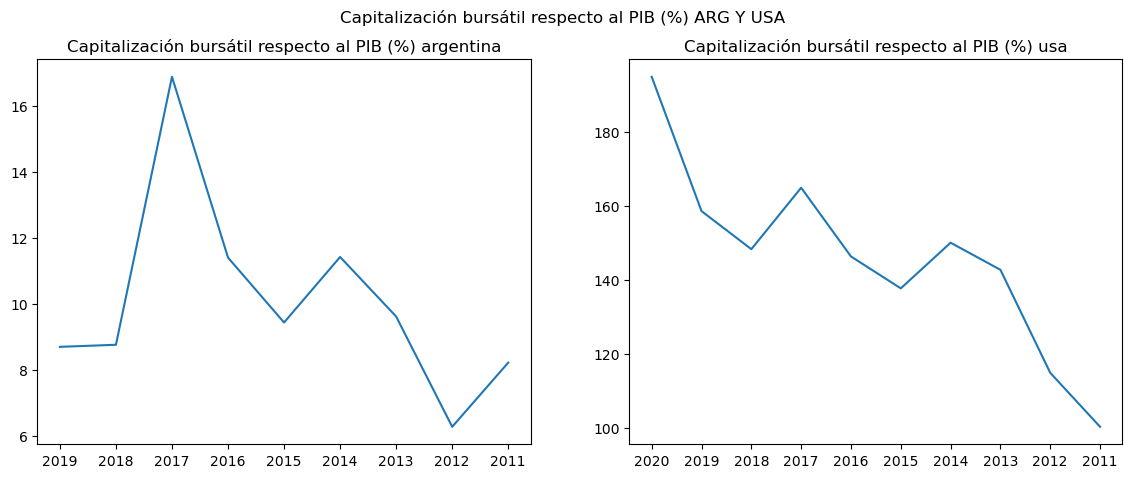

In [8]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 
fig, ax = plt.subplots(figsize=(14, 5), ncols=2, nrows=1)

# Definimos primer gráfico
ax[0].plot(y1, x1)
ax[0].set_title("Capitalización bursátil respecto al PIB (%) argentina")

# Definimos segundo gráfico
ax[1].plot(y2, x2)
ax[1].set_title("Capitalización bursátil respecto al PIB (%) usa")

# Definimos título general de la figura
fig.suptitle("Capitalización bursátil respecto al PIB (%) ARG Y USA")
plt.show()

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
url = "https://www.lanacion.com.ar/"
response = requests.get(url)
print(response.status_code)
soup = BeautifulSoup(response.text, 'html.parser')

links = soup.find_all('a')
enlaces = []
for link in links:
    href = link.get('href')
    if href:
        if not href.startswith('http'):
            href = "https://www.lanacion.com.ar" + href
            enlaces.append(href)
df = pd.DataFrame(enlaces, columns=['Enlaces'])
display(df)
print(os.getcwd())
#os.chdir(".\\Documents")
df.to_excel("TP1 Uba punto N.xlsx")


200


,Enlaces
0,https://www.lanacion.com.ar/clima/
1,https://www.lanacion.com.ar/
2,https://www.lanacion.com.ar#
3,https://www.lanacion.com.ar/autos/
4,https://www.lanacion.com.ar/salud/
...,...
153,https://www.lanacion.com.ar/revista-living/lle...
154,https://www.lanacion.com.ar/loterias/ganaron-m...
155,https://www.lanacion.com.ar/politica/calendari...
156,https://www.lanacion.com.ar/espectaculos/como-...


C:\Users\El economista\Documents\GitHub\-BigDataUBA-Grupo-25\TPs\TP1_Jugando con APIS y Webscrapping
